# ENGR 3703 Project - What you have to do

The project involves a very common problem in engineering - the spring-mass-damper problem. It has applications in electrical and mechanical engineering and beyond. The basic problem is below:

![image info](./spring_mass_damper.jpg)

In the figure the variables and parameters have the following meaning:

- $m$ = mass (kg)
- $c$ = damping constant (kg/s) - proportional to the speed of $m$
- $k$ = spring constant (N/s/s) - proportional to the distance $m$ is from it's 
- $x(t)$ = position of $m$ as a function of time
- $F(t)$ = A force applied to $m$ as a function of time

In the background notebook, we determined that:

$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$


1. Create a github repository to host your project files. If you do not have a github account you will need to create one. I will need a link to the repo. If the repo is not public you will need to make me a collaborator so I can access the repo.
    a. You can have as many files as you want in the repo, but there should be a single jupyter notebook called: yourname_engr3703_fall2021_project.ipynb. This will serve as your report for the project.
2. Write python code that uses RK 4th order to solve the ODE above. For the first part of the project, you will assume F(t) is zero. Later you will be using F(t), so plan accordingly.
3. Test your code with all three unforced cases - overdamping, critically damped, and underdamping. You will choose the values of $\omega_n$ and $\zeta$. You will need to demonstrate your code works over a range of time-step sizes for all cases. Code and graphics are required. You should calculate and verify that both $x(t)$ and $v(t)$ can reliably be calculated using Runge-Kutta by numerically and graphically comparing the analytical solutions and the calculated values from your RK program.
4. Test your code using values of F(t)/m. You must choose at least three values two of which may not be constant values of F(t) - i.e. there has to be some time variation of F. You should analyze the results of these tests. If there are known solutions for a given F(t) compare to those. In the end you need to convice the reader (Dr. Lemley) that your code is accurately calculating both x(t) and v(t) for each of these cases. Again, numerical and graphical evidence is required.
5. Finally test your code with $F(t)/m = Acos{\omega_f t}$ where you choose the value of $A$. You should vary $\omega_d$ over a range of values such that you can see instances where the oscillations (x(t)) are growing out of control over time (i.e. resonance). Graphically show how this occuring by displaying cases with different $\omega_f$ change the velocity and position over time.


## Metrics for Grading
- 25% Correctly Working Code
- 25% Quality of Analysis 
- 25% Quality of Graphics 
- 25% Overall Quality of the Notebook - including formatting, readability, and clarity

### Project Collaboration

It is fine in class to discuss what you are doing on your project. However, what you submit for the project has to be your own work. It would be easy to copy someone else's code, but don't do it. The result will be a zero for the project. The analysis should be your own as well. Basically, only submit work you did yourself. The result of submitting *any* work someone else has done will be a *zero for the project grade.*




##### I created the code below and meshed problem 2 and 3 together as problem 2's code shown directly below is overdamped and works for the first part of problem 3 as well.

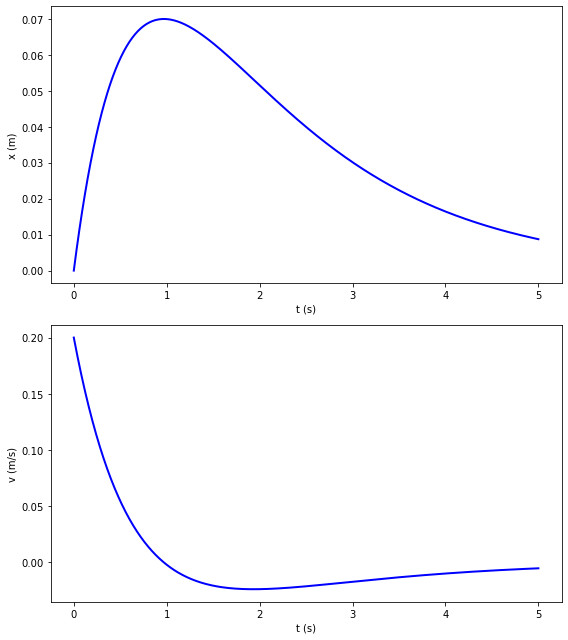

In [5]:
#3 overdamped
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = 1.1 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0                   #5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

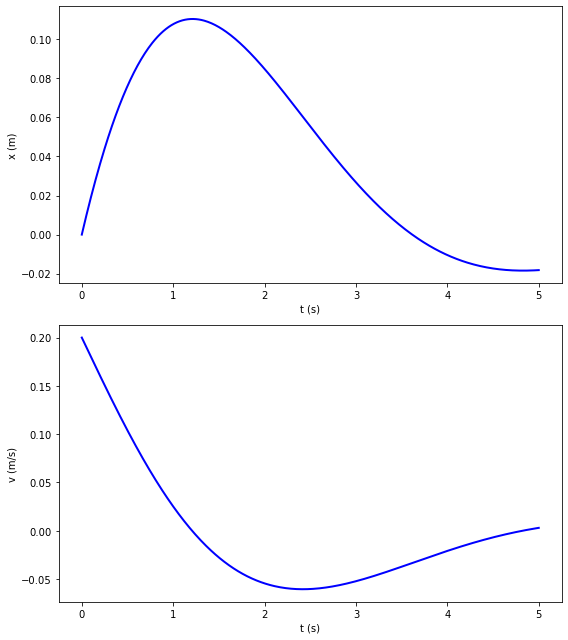

In [6]:
#3 underdamped
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = .5 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0                   #5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

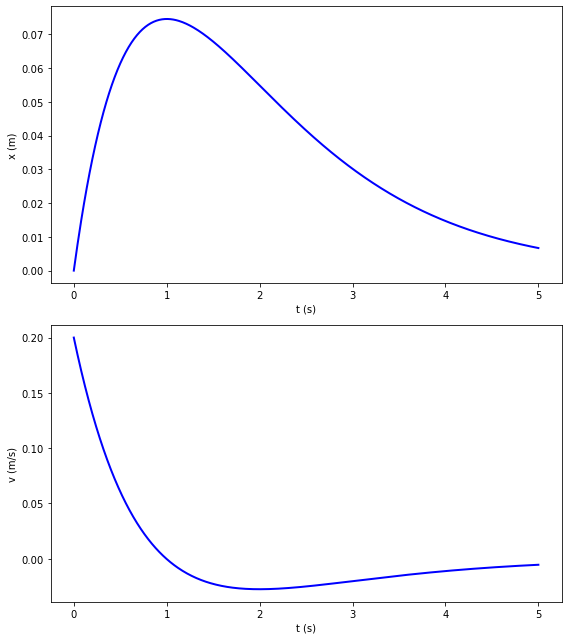

In [7]:
#3 critically damped
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = 1 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 0                   #5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

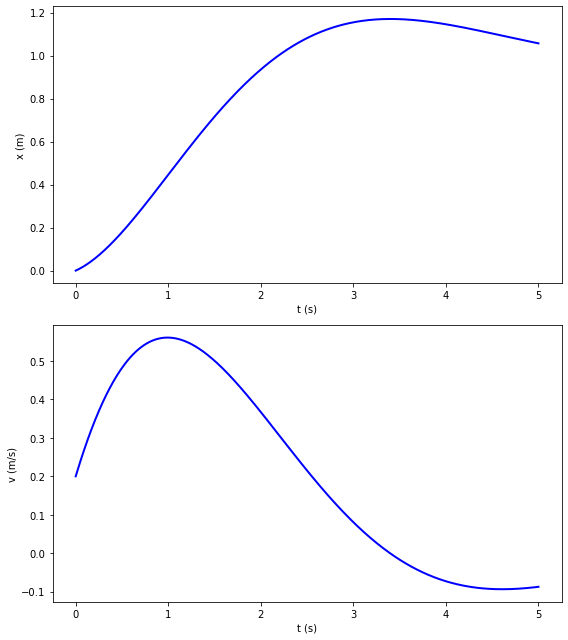

In [2]:
#4 using alternative metheds from f/m = 0
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = .5 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.    #added in the 4th order RK values

F_over_m = lambda t: 1    # we set the value of f/m to 1 and ran the code for an underdamped system
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)             #applied the new constants to the k values
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

###### Using the graphs from the code we created in class for this project with this value of f/m we get a fairly close match. The differences could be because of the higher order method.

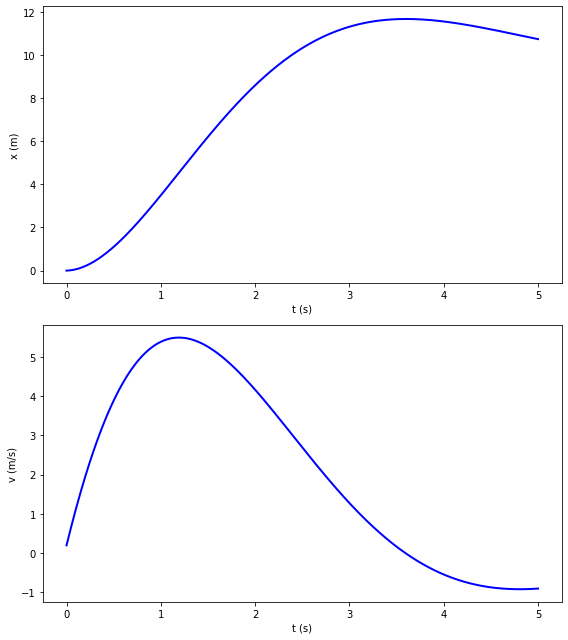

In [3]:
#4 underdamped 4th order RK using f/m = 10
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = .5 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t: 10                   #5*sin(2*pi*sqrt(k)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

###### Again I used the 3rd order code we used made in class and added f/m = 10 to it and got graphs that looked similar to these

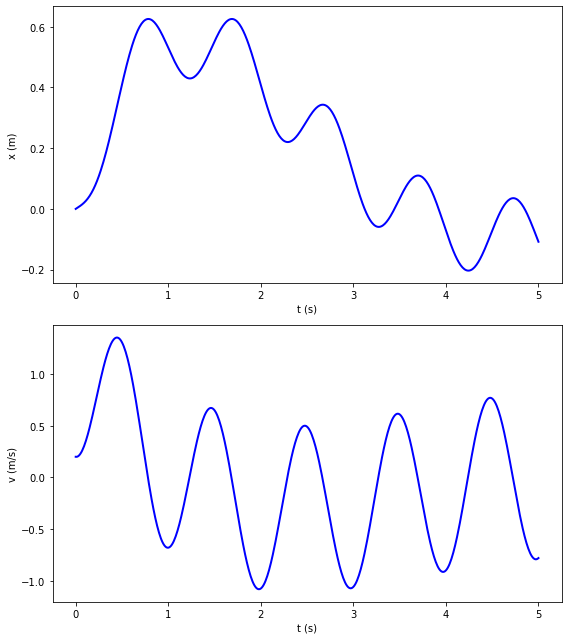

In [7]:
#4 underdamped 4th order f/m = 5*sin(2*pi*sqrt(omega)*t)
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = .5 #1/s gamma
omega = 1. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.

F_over_m = lambda t:5*sin(2*pi*sqrt(omega)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

###### using the original value for f/m from the in class solution we get similar graphs in both 3rd and 4th order RK.

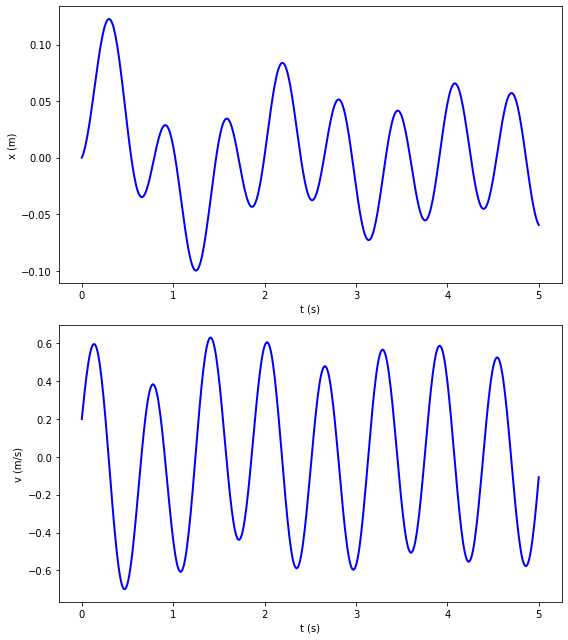

In [9]:
#5 underdamped system 4th order RK using Acos(wt)
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

zeta = .5 #1/s gamma
omega = 10. #N/m/kg k
#RK4 constants
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.
#𝐹(𝑡)/𝑚=𝐴𝑐𝑜𝑠𝜔𝑓t
F_over_m = lambda t:5*cos((omega)*t)
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*v - omega*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt+b43*K3*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1*dt+b42*K2*dt+b43*K3*dt)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 5.0    #final value for t
n = 500     #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 0.2 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

#for i in range(1,n):
 #   x_rk4[i] = a + i*h
 #   y_rk4[i] = rk4(x_rk4[i-1],y_rk4[i-1],c1,c2,c3,c4,a2,a3,a4,b21,b31,b32,b41,b42,b43,h)
    
for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
#plt.title("x versus t and v versus t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

###### Using A=5 and omega = 10 we see a clear ocilation in the graph and no errors in the code. I used omega = 10 because the omega =1 did not show the 